<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-AppliedComputationalMethods/blob/main/Module_G_Section_21_1%2C_21_2%2C_21_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module G:** Section 21.1, 21.2, 21.3

### Numerical integration
Scientific Python provides a number of integration routines. A general purpose tool to solve integrals I of the kind


$$ I=\int_a^b f(x) \mathrm{d} x $$

is provided by the quad() function of the scipy.integrate module.

It takes as input arguments the function f(x) to be integrated (the “integrand”), and the lower and upper limits a and b. It returns two values (in a tuple): the first one is the computed results and the second one is an estimation of the numerical error of that result.

Here is an example: which produces this output:

In [1]:
from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

The numerical result is 17.864264 (+-1.55117e-11)


Note that quad() takes optional parameters epsabs and epsrel to increase or decrease the accuracy of its computation. (Use help(quad) to learn more.) The default values are epsabs=1.5e-8 and epsrel=1.5e-8. For the next exercise, the default values are sufficient.

### Solving ordinary differential equations

To solve an ordinary differential equation of the type
$$ \frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(y,t) $$
with a given  $y(t0)=y_0$, we can use scipy’s odeint function. Here is a (self explaining) example program (`useodeint.py`) to find

Text(0, 0.5, 'y(t)')

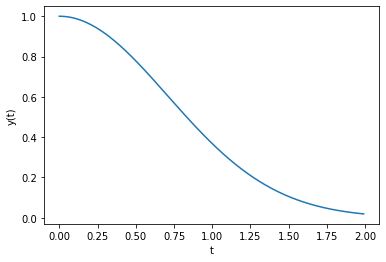

In [2]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as N

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

t = N.arange(a, b, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, y0, t)  # actual computation of y(t)

import pylab          # plotting of results
pylab.plot(t, y)
pylab.xlabel('t'); pylab.ylabel('y(t)')

The `odeint` command takes a number of optional parameters to change the default error tolerance of the integration (and to trigger the production of extra debugging output).

### Root finding
If you try to find a $ x $ such that
$$ f(x)=0$$ 
 
then this is called root finding. Note that problems like $ g(x)=h(x) $ fall in this category as you can rewrite them as $ f(x)=g(x)−h(x)=0 $.

A number of root finding tools are available in scipy’s optimize module.

#### Root finding using the bisection method
irst we introduce the bisect algorithm which is (i) robust and (ii) slow but conceptually very simple.

Suppose we need to compute the roots of $f(x)=x^3 − 2x^2$. This function has a (double) root at $x = 0$ (this is trivial to see) and another root which is located between $x = 1.5$ (where $f(1.5)= − 1.125)$ and $x = 3$ (where $f(3)=9$). It is pretty straightforward to see that this other root is located at $x = 2$. Here is a program that determines this root numerically:

In [3]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here
x = bisect(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


The `bisect()` method takes three compulsory arguments: (i) the function f(x), (ii) a lower limit a (for which we have chosen 1.5 in our example) and (ii) an upper limit b (for which we have chosen 3). The optional parameter xtol determines the maximum error of the method.

One of the requirements of the bisection method is that the interval `[a, b]` has to be chosen such that the function is either positive at a and negative at b, or that the function is negative at a and postive at b. In other words: a and b have to enclose a root.

#### Interpolation

Given a set of $N$ points $ (xi, yi) $ with $ i = 1, 2, …N $, we sometimes need a function  $\hat{f}(x)$  which returns $ y_i = f(x_i) $ where $ x==x_i $, and which in addition provides some interpolation of the data $ (x_i, y_i) $ for all $ x $.

The function `y0 = scipy.interpolate.interp1d(x,y,kind=’nearest’)` does this interpolation based on splines of varying order. Note that the function `interp1d` returns a function `y0` which will then interpolate the x-y data for any given ` x ` when called as ` y0(x) `.

The code below demonstrates this, and shows the different interpolation kinds.

Text(0.5, 0, 'x')

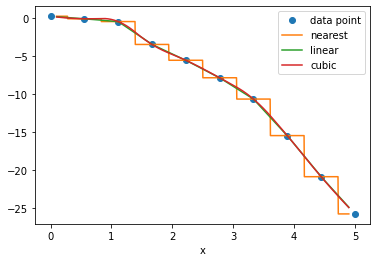

In [4]:
import numpy as np
import scipy.interpolate
import pylab

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

### Curve fitting
We have already seen in the numpy chapter that we can fit polynomial functions through a data set using the `numpy.polyfit` function. Here, we introduce a more generic curve fitting algorithm.

Scipy provides a somewhat generic function (based on the Levenburg-Marquardt algorithm )through `scipy.optimize.curve_fit` to fit a given (Python) function to a given data set. The assumption is that we have been given a set of data with points  `x1, x2, …xN ` and with corresponding function values  yi  and a dependence of  `yi`  on  `xi`  such that  `yi=f(xi,p )` . We want to determine the parameter vector ` p =(p1,p2,…,pk)`  so that  `r` , the sum of the residuals, is as small as possible:

$$ r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2
$$

Curve fitting is of particular use if the data is noisy: for a given $ x_i $ and $ y_i=f(x_i,\vec{p}) $ we have a (unknown) error term  $\epsilon_i$  so that $y_i=f(x_i,\vec{p})+\epsilon_i $.

We use the following example to clarify this:

Optimal parameters are a=2.55302, b=1.2408, and c=0.456132


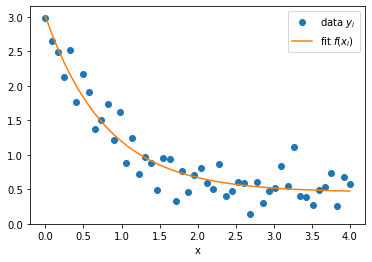

In [5]:
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

#plotting
import pylab
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])
pylab.plot(x, yi, 'o', label='data $y_i$')
pylab.plot(x, yfitted, '-', label='fit $f(x_i)$')
pylab.xlabel('x')
pylab.legend()


Note that in the source code above we define the fitting function  $y = f(x) $ through Python code. We can thus fit (nearly) arbitrary functions using the curve_fit method.

The `curve_fit` function returns a tuple `popt`, `pcov`. The first entry `popt` contains a tuple of the OPTimal Parameters (in the sense that these minimise equation ([eq:1]). The second entry contains the covariance matrix for all parameters. The diagonals provide the variance of the parameter estimations.

For the curve fitting process to work, the Levenburg-Marquardt algorithm needs to start the fitting process with initial guesses for the final parameters. If these are not specified (as in the example above), the value “1.0“ is used for the initial guess.

If the algorithm fails to fit a function to data (even though the function describes the data reasonably), we need to give the algorithm better estimates for the initial parameters. For the example shown above, we could give the estimates to the `curve_fit` function by changing the line

```
popt, pcov = curve_fit(f, x, yi)
```
to
```
popt, pcov = curve_fit(f, x, yi, p0=(2,1,0.6))

```

if our initial guesses would be a = 2, b = 1 and c = 0.6. Once we take the algorithm “roughly in the right area” in parameter space, the fitting usually works well.

